In [2]:
#the usuals
import pandas as pd
import numpy as np

In [19]:
#bringing in the helper functions
from helper import *

In [2]:
path='/home/rachel/Galvanize/capston1/data/'

In [46]:
df = pd.read_json(path+'COAL.json', orient = 'index')#.iloc[:1000,:]

In [42]:
df.head()

,name,units,f,description,copyright,source,iso3166,geography,start,end,...,2000Q1,2008,2007,2006,2005,2004,2003,2002,2001,2000
COAL.ASH_CONTENT.OH-3.A,Ash content : Ohio : electric utility cogen : ...,percent,A,Power plants owned by regualted electric utili...,None,"EIA, U.S. Energy Information Administration",USA-OH,USA-OH,2009,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COAL.ASH_CONTENT.MS-2.Q,Ash content : Mississippi : electric utility n...,percent,Q,Power plants owned by regulated electric utilt...,None,"EIA, U.S. Energy Information Administration",USA-MS,USA-MS,2008Q1,2017Q1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COAL.ASH_CONTENT.MO-98.Q,Ash content : Missouri : electric power (total...,percent,Q,Power plants owned by companies whose primary ...,None,"EIA, U.S. Energy Information Administration",USA-MO,USA-MO,2008Q1,2017Q1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COAL.ASH_CONTENT.MS-10.Q,Ash content : Mississippi : other industrial :...,percent,Q,The U.S. coal data is collected and prepared f...,None,"EIA, U.S. Energy Information Administration",USA-MS,USA-MS,2000Q1,2017Q1,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COAL.ASH_CONTENT.NEW-1.Q,Ash content : New England (total) : electric u...,percent,Q,Power plants owned by regulated electric utilt...,None,"EIA, U.S. Energy Information Administration",NaN,USA-CT+USA-MA+USA-ME+USA-NH+USA-RI+USA-VT,2008Q1,2017Q1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df.shape

(169316, 20)

The coal json file , when put into a data frame has 169316 rows

useful data is nested in a dictionary inside the data column of each row.

The functions from the helper.py, used below, expands the the df to include columns of all the possible keys in the data dictionaries , and fills rows with the corresponding values from the dictionary.

Trying this pipeline with the full coal df seemed to never want to complete and made my computer sound like it was going lift off my desk. so i decided to limit the rows by parsing the name column for anything to do with coal ash

In [47]:
coal_ash_df = df[df['name'].str.match('Ash content')]

In [48]:
coal_ash_df.shape
#only 651 rows. much better

(651, 20)

In [49]:

fill_data_vals( coal_ash_df)


/home/rachel/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/rachel/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [51]:
coal_ash_df.head(5)
#tada! a bunch of new columns with yearly measurments inside (al you see is nans in this head statement becasue the data dictionaries are diffent sizes and the columns are all possible keys)

,name,units,f,description,copyright,source,iso3166,geography,start,end,...,2000Q1,2008,2007,2006,2005,2004,2003,2002,2001,2000
COAL.ASH_CONTENT.OH-3.A,Ash content : Ohio : electric utility cogen : ...,percent,A,Power plants owned by regualted electric utili...,None,"EIA, U.S. Energy Information Administration",USA-OH,USA-OH,2009,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COAL.ASH_CONTENT.MS-2.Q,Ash content : Mississippi : electric utility n...,percent,Q,Power plants owned by regulated electric utilt...,None,"EIA, U.S. Energy Information Administration",USA-MS,USA-MS,2008Q1,2017Q1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COAL.ASH_CONTENT.MO-98.Q,Ash content : Missouri : electric power (total...,percent,Q,Power plants owned by companies whose primary ...,None,"EIA, U.S. Energy Information Administration",USA-MO,USA-MO,2008Q1,2017Q1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COAL.ASH_CONTENT.MS-10.Q,Ash content : Mississippi : other industrial :...,percent,Q,The U.S. coal data is collected and prepared f...,None,"EIA, U.S. Energy Information Administration",USA-MS,USA-MS,2000Q1,2017Q1,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COAL.ASH_CONTENT.NEW-1.Q,Ash content : New England (total) : electric u...,percent,Q,Power plants owned by regulated electric utilt...,None,"EIA, U.S. Energy Information Administration",NaN,USA-CT+USA-MA+USA-ME+USA-NH+USA-RI+USA-VT,2008Q1,2017Q1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


the f column informs you if the row records anually or quarterly

In [55]:
coal_ash_df["f"].head()

COAL.ASH_CONTENT.OH-3.A     A
COAL.ASH_CONTENT.MS-2.Q     Q
COAL.ASH_CONTENT.MO-98.Q    Q
COAL.ASH_CONTENT.MS-10.Q    Q
COAL.ASH_CONTENT.NEW-1.Q    Q
Name: f, dtype: object

In [57]:
# i check to see how many rows per state there where
len(coal_ash_df.loc[coal_ash_df['geography']=='USA-AL'])

11

In [60]:
#lets what information they provide for an individual state
coal_ash_df.loc[coal_ash_df['geography']=='USA-AL']['name']

COAL.ASH_CONTENT.AL-1.A     Ash content : Alabama : electric utility : annual
COAL.ASH_CONTENT.AL-9.A          Ash content : Alabama : coke plants : annual
COAL.ASH_CONTENT.AL-94.A    Ash content : Alabama : independent power prod...
COAL.ASH_CONTENT.AL-98.A    Ash content : Alabama : electric power (total)...
COAL.ASH_CONTENT.AL-98.Q    Ash content : Alabama : electric power (total)...
COAL.ASH_CONTENT.AL-3.A     Ash content : Alabama : electric utility cogen...
COAL.ASH_CONTENT.AL-10.Q    Ash content : Alabama : other industrial : qua...
COAL.ASH_CONTENT.AL-9.Q       Ash content : Alabama : coke plants : quarterly
COAL.ASH_CONTENT.AL-1.Q     Ash content : Alabama : electric utility : qua...
COAL.ASH_CONTENT.AL-3.Q     Ash content : Alabama : electric utility cogen...
COAL.ASH_CONTENT.AL-10.A    Ash content : Alabama : other industrial : annual
Name: name, dtype: object

It looks like there is ash content break downs for individual sectors.

I have noticed that some rows are groups of states. Rows that represent individual states have a non null value in  iso3166 colum so below i am makeing a subset df of just coal ash reporting by state with only useful columns [name,f, description, iso3166, and the last 86 columns which are the data]


In [64]:
coal_ash_df.shape

(327, 106)

In [61]:
# filtering out duplicates by choosing to just look at anual reporting
coal_ash_df = coal_ash_df[coal_ash_df['f']=='A']

In [62]:
coal_ash_df.shape
#this did not filter..... lets keep going and do it in a different way

(327, 106)

In [63]:
# there are 86 columns of years
coal_ash_df.iloc[:,-86:].head()

,2016,2015,2014,2013,2012,2011,2010,2009,2017Q1,2016Q4,...,2000Q1,2008,2007,2006,2005,2004,2003,2002,2001,2000
COAL.ASH_CONTENT.OH-3.A,0.00,0.00,0.00,0.00,0.00,7.53,6.600000,6.700000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COAL.ASH_CONTENT.NEW-10.A,8.48,7.15,6.87,6.13,6.07,6.26,7.130000,7.240000,NaN,NaN,...,NaN,6.860000,6.72,7.41,7.71,6.68,6.12,6.32,0.0,0.0
COAL.ASH_CONTENT.NEW-2.A,7.94,8.49,8.25,8.87,10.30,9.18,8.054198,6.823789,NaN,NaN,...,NaN,5.624109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COAL.ASH_CONTENT.NEW-98.A,7.94,8.10,8.13,8.53,9.33,8.51,8.574251,7.328321,NaN,NaN,...,NaN,6.332277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COAL.ASH_CONTENT.NH-1.A,7.87,7.39,7.77,7.66,7.67,7.08,6.970000,7.410000,NaN,NaN,...,NaN,6.770000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# filtering for individual states
coal_ash_df.dropna(subset=['iso3166'],inplace=True)
coal_ash_df.shape

(257, 106)

In order to make a new data fram with just the columns I want, Im going to split and recomdind

In [66]:
# just name and state
coal_ash_df_1= coal_ash_df.filter(items=['name','iso3166'])
coal_ash_df_1.shape

(257, 2)

In [67]:
#just year columns
coal_ash_df_2 = coal_ash_df.iloc[:,-86:]
coal_ash_df_2.shape

(257, 86)

In [68]:
# concatinating the two sets of columns to get only useful info
ash_anual_state_df = coal_ash_df_1.join(coal_ash_df_2)
ash_anual_state_df.shape

(257, 88)

In [69]:
# filtering for just anual data. The new way!
anual_cols = [c for c in ash_anual_state_df.columns if not 'Q' in c]
#lets sort the years while we are at it
ash_anual_state_df = ash_anual_state_df[sorted(anual_cols)]


In [71]:
ash_anual_state_df.shape

(257, 19)

NameError: name 'ash_anual_state' is not defined

upon inspection it looks like i filtered out some state when i only included rows that did not have nans in the iso6133 column. Lets try this gain and use the geography column that has region and states

In [74]:
coal_ash_df = df[df['name'].str.match('Ash content')]
fill_data_vals( coal_ash_df);

In [79]:
# just name and state
coal_ash_df_1= coal_ash_df.filter(items=['name','geography'])
#just year columns
coal_ash_df_2 = coal_ash_df.iloc[:,-86:]
# concatinating the two sets of columns to get only useful info
ash_anual_state_df = coal_ash_df_1.join(coal_ash_df_2)
# filtering for just anual data. The new way!
anual_cols = [c for c in ash_anual_state_df.columns if not 'Q' in c]
#lets sort the years while we are at it
ash_anual_state_df = ash_anual_state_df[sorted(anual_cols)]
ash_anual_state_df.shape

(651, 19)

WELL there are alot more rows. lets inspect...

In [88]:
ash_anual_state_df['geography']

COAL.ASH_CONTENT.OH-3.A                                         USA-OH
COAL.ASH_CONTENT.MS-2.Q                                         USA-MS
COAL.ASH_CONTENT.MO-98.Q                                        USA-MO
COAL.ASH_CONTENT.MS-10.Q                                        USA-MS
COAL.ASH_CONTENT.NEW-1.Q     USA-CT+USA-MA+USA-ME+USA-NH+USA-RI+USA-VT
                                               ...                    
COAL.ASH_CONTENT.ID-8.A                                         USA-ID
COAL.ASH_CONTENT.MT-10.A                                        USA-MT
COAL.ASH_CONTENT.PCC-1.Q                          USA-CA+USA-OR+USA-WA
COAL.ASH_CONTENT.PCN-10.A                                USA-AK+USA-HI
COAL.ASH_CONTENT.OK-94.A                                        USA-OK
Name: geography, Length: 651, dtype: object

**ash_anual_state_df is a datframe of ash content per state or region per year**

In [89]:
#ash_anual_state_df.iloc[:,:17]

Lets look at one region and go a little deeper

In [123]:
mountain_ash = ash_anual_state_df[ash_anual_state_df['name'].str.contains('Mountain')]
for i in range(14):
    print(mountain_ash['name'][i])


Ash content : Mountain (total) : electric utility : annual
Ash content : Mountain (total) : electric utility : quarterly
Ash content : Mountain (total) : other industrial : annual
Ash content : Mountain (total) : other industrial : quarterly
Ash content : Mountain (total) : electric utility non-cogen : annual
Ash content : Mountain (total) : electric utility cogen : annual
Ash content : Mountain (total) : commercial and institutional : annual
Ash content : Mountain (total) : independent power producers (total) : annual
Ash content : Mountain (total) : independent power producers (total) : quarterly
Ash content : Mountain (total) : electric power (total) : quarterly
Ash content : Mountain (total) : electric utility cogen : quarterly
Ash content : Mountain (total) : electric power (total) : annual
Ash content : Mountain (total) : commercial and institutional : quarterly
Ash content : Mountain (total) : electric utility non-cogen : quarterly


In mountain ash data frame there is a row for ash percent per year in each sector

In [ ]:
Lets see which sectors are dirtier

Lets make the sectors into columns and the years into rows for quick sector refernce and change the index to the name column


In [131]:
mountain_ash = mountain_ash.reset_index().set_index('name')
# and lets drop the "index" column and geography column
mountain_ash.drop(['index',"geography"],axis=1,inplace=True)

In [170]:
mountain_ash = mountain_ash.T
mountain_ash.head(16)

name,Ash content : Mountain (total) : electric utility : annual,Ash content : Mountain (total) : electric utility : quarterly,Ash content : Mountain (total) : other industrial : annual,Ash content : Mountain (total) : other industrial : quarterly,Ash content : Mountain (total) : electric utility non-cogen : annual,Ash content : Mountain (total) : electric utility cogen : annual,Ash content : Mountain (total) : commercial and institutional : annual,Ash content : Mountain (total) : independent power producers (total) : annual,Ash content : Mountain (total) : independent power producers (total) : quarterly,Ash content : Mountain (total) : electric power (total) : quarterly,Ash content : Mountain (total) : electric utility cogen : quarterly,Ash content : Mountain (total) : electric power (total) : annual,Ash content : Mountain (total) : commercial and institutional : quarterly,Ash content : Mountain (total) : electric utility non-cogen : quarterly
2000,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,NaN,NaN,7.69,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,NaN,NaN,7.34,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,NaN,NaN,8.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,NaN,NaN,7.41,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,NaN,NaN,7.85,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,7.65,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,11.010610,NaN,8.17,NaN,10.540232,10.97,9.52,10.548918,NaN,NaN,NaN,10.954343,NaN,NaN
2009,11.219591,NaN,7.91,NaN,10.595096,9.16,8.85,10.560674,NaN,NaN,NaN,11.151583,NaN,NaN


In [165]:
# columns to compair for graph (because of all the nans i am going to look at only the last 8 years)
cols = ['Ash content : Mountain (total) : electric utility cogen : annual',
'Ash content : Mountain (total) : electric utility non-cogen : annual', 
'Ash content : Mountain (total) : other industrial : annual',
'Ash content : Mountain (total) : commercial and institutional : annual',
'Ash content : Mountain (total) : independent power producers (total) : annual',
'Ash content : Mountain (total) : electric power (total) : annual']

labels = ['electric utility cogen','electric utility non-cogen','other industrial','commercial and institutional','independent power producers','electric power (total)']

x = [2008,2009,2010,2011,2012,2013,2014,2015,2016]

NOTE: if below cell doesnt work, the above cell that transposes the df was ran to many time. run it again ONCE, then re run below cell

''

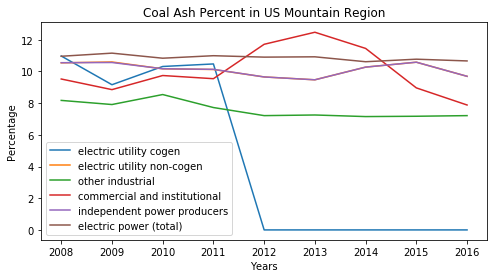

In [181]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots()
fig.set_size_inches(8,4)

for i, column in enumerate(cols):
    axs.plot(x,mountain_ash[column][-9:],label = labels[i])
    

axs.legend()
axs.set_title('Coal Ash Percent in US Mountain Region')
axs.set_ylabel('Percentage')
axs.set_xlabel('Years')
plt.savefig('images/mountain-ash.png')
;

There are few few things worth noting in this graph. On first inspection "electric utility non-cogen" appears to be missing. Upon further inspection of the data table I saw that non-cogen utility and independent power measurments of ash ar almost exactly the same every year. This make me wonder if almost all independant power producers do not use cogeneration technologies. Also reporting on electric utility plants seems to have stopped in 2012 because all values drop to zero. As a summary I would say that independant power producers, electric utility and other industrial are are not burning coal any cleaner since recording started, but the commercial and industrial is making some changes and I would love to see data in the more recient years. (Remember this is only for the mountain region of the us)

lets take a broader look at each region/states average ash percentage (i would like to sum but the units are percentages)

In [188]:
ash_anual_groupy = ash_anual_state_df.groupby(['geography']).mean().T
ash_anual_groupy


geography,USA,USA-AK,USA-AK+USA-HI,USA-AL,USA-AL+USA-KY+USA-MS+USA-TN,USA-AR,USA-AR+USA-LA+USA-OK+USA-TX,USA-AZ,USA-AZ+USA-CO+USA-ID+USA-MT+USA-NM+USA-NV+USA-UT+USA-WY,USA-CA,...,USA-SC,USA-SD,USA-TN,USA-TX,USA-UT,USA-VA,USA-WA,USA-WI,USA-WV,USA-WY
2000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.0000,0.000000,0.000,0.000000,0.0000,0.000000,0.000000,0.000000
2001,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.0000,0.000000,0.000,0.000000,0.0000,0.000000,0.000000,0.000000
2002,5.206667,0.000,0.000000,6.955000,4.450000,11.450000,5.370000,13.000000,3.845000,8.6000,...,7.890000,5.050000,3.9550,5.795000,8.550,3.960000,10.0800,3.720000,7.680000,2.515000
2003,5.193333,0.000,0.000000,7.210000,4.620000,11.160000,5.425000,11.530000,3.670000,8.0200,...,8.050000,4.940000,3.8500,5.860000,9.000,4.000000,9.0500,3.630000,8.400000,2.475000
2004,5.420000,0.000,0.000000,8.080000,4.886667,11.070000,5.185000,12.030000,4.000000,9.5100,...,8.660000,4.950000,3.9100,5.515000,9.770,4.315000,9.1800,3.570000,8.865000,2.580000
2005,5.466667,0.000,0.000000,8.430000,4.890000,10.860000,5.610000,11.420000,3.705000,10.7700,...,8.890000,4.960000,3.9900,6.080000,9.650,4.385000,8.1800,3.600000,8.775000,2.135000
2006,5.410000,0.000,0.000000,8.515000,4.936667,11.870000,5.750000,11.970000,3.925000,10.0800,...,8.810000,4.960000,3.8700,6.215000,8.360,4.445000,8.4500,3.750000,8.430000,2.490000
2007,5.430000,0.000,0.000000,8.150000,4.853333,12.130000,4.475000,12.040000,3.825000,10.0200,...,8.700000,5.050000,3.8650,4.620000,8.970,4.295000,7.9300,3.845000,8.230000,2.380000
2008,10.105000,6.324,7.625901,9.288333,9.666450,7.553333,9.692929,11.790000,10.244872,10.6625,...,10.502000,5.323333,7.9525,9.626000,23.662,9.271429,9.1875,5.756667,15.290000,6.692000
2009,10.247500,10.354,10.364415,9.143333,10.224300,7.646667,9.583375,12.160000,9.920992,9.9725,...,9.400000,5.426667,7.9075,9.766000,23.846,9.442857,7.6650,6.102500,15.354286,7.274000


In [189]:
ash_anual_groupy.columns


Index(['USA', 'USA-AK', 'USA-AK+USA-HI', 'USA-AL',
       'USA-AL+USA-KY+USA-MS+USA-TN', 'USA-AR', 'USA-AR+USA-LA+USA-OK+USA-TX',
       'USA-AZ', 'USA-AZ+USA-CO+USA-ID+USA-MT+USA-NM+USA-NV+USA-UT+USA-WY',
       'USA-CA', 'USA-CA+USA-OR+USA-WA', 'USA-CO', 'USA-CT',
       'USA-CT+USA-MA+USA-ME+USA-NH+USA-RI+USA-VT', 'USA-DC',
       'USA-DC+USA-DE+USA-FL+USA-GA+USA-MD+USA-NC+USA-SC+USA-VA+USA-WV',
       'USA-DE', 'USA-FL', 'USA-GA', 'USA-HI', 'USA-IA',
       'USA-IA+USA-KS+USA-MN+USA-MO+USA-ND+USA-NE+USA-SD', 'USA-ID', 'USA-IL',
       'USA-IL+USA-IN+USA-MI+USA-OH+USA-WI', 'USA-IN', 'USA-KS', 'USA-KY',
       'USA-LA', 'USA-MA', 'USA-MD', 'USA-ME', 'USA-MI', 'USA-MN', 'USA-MO',
       'USA-MS', 'USA-MT', 'USA-NC', 'USA-ND', 'USA-NE', 'USA-NH', 'USA-NJ',
       'USA-NJ+USA-NY+USA-PA', 'USA-NM', 'USA-NV', 'USA-NY', 'USA-OH',
       'USA-OK', 'USA-OR', 'USA-PA', 'USA-RI', 'USA-SC', 'USA-SD', 'USA-TN',
       'USA-TX', 'USA-UT', 'USA-VA', 'USA-WA', 'USA-WI', 'USA-WV', 'USA-WY'],
      d

Text(0, 0.5, 'Ash content (percent)')

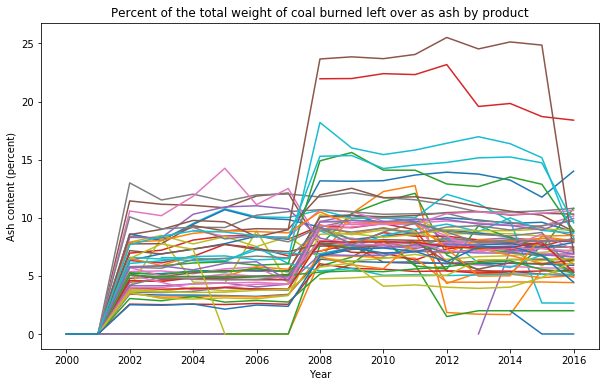

In [196]:
### lets try and get scatterplot to lay on top of each
x = np.arange(2000,2017)

fig, axs = plt.subplots()
fig.set_size_inches(10,6)
for col in ash_anual_groupy.columns:
    axs.plot(x,ash_anual_groupy[col])
#axs.legend()
axs.set_title('Percent of the total weight of coal burned left over as ash by product')
axs.set_xlabel('Year')
axs.set_ylabel('Ash content (percent)')
#plt.savefig('images/ugly-coal-ash.png');

**WHat happend in 2008??:**
 https://www.eia.gov/coal/review/pdf/feature08.pdf
 - There was a change over in preadents which  may have changed some regulations on the cleanlyness of coal or even how the ash byproduct is reported


lets turn this into a scatter


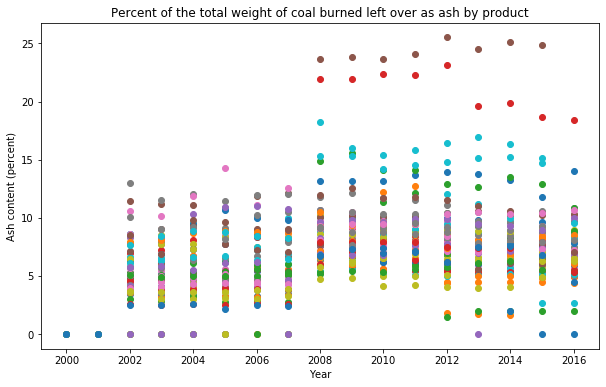

In [197]:
### lets try and get scatterplot to lay on top of each
x = np.arange(2000,2017)

fig, axs = plt.subplots()
fig.set_size_inches(10,6)
for col in ash_anual_groupy.columns:
    axs.plot(x,ash_anual_groupy[col],'o')
#axs.legend()
axs.set_title('Percent of the total weight of coal burned left over as ash by product')
axs.set_xlabel('Year')
axs.set_ylabel('Ash content (percent)')
plt.savefig('images/ave-coal-ash.png');

lets make an average average hline. to do so i will ad some colunmns to my data

In [200]:
ash_anual_groupy['mean'] = ash_anual_groupy.mean(axis=1)
ash_anual_groupy['stdev'] = ash_anual_groupy.std(axis=1)

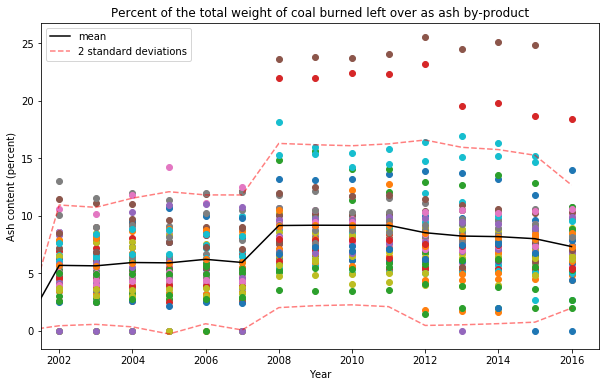

In [222]:

x = np.arange(2000,2017)

fig, axs = plt.subplots()
fig.set_size_inches(10,6)
for col in ash_anual_groupy.columns:
    axs.plot(x,ash_anual_groupy[col],'o')
#axs.legend()
axs.set_title('Percent of the total weight of coal burned left over as ash by-product')
axs.set_xlabel('Year')
axs.set_ylabel('Ash content (percent)')

axs.plot(x,ash_anual_groupy['mean'],color='k',label='mean')
axs.plot(x,ash_anual_groupy['mean']+2*ash_anual_groupy['stdev'],'--',color='r',label='2 standard deviations',alpha=.5)
axs.plot(x,ash_anual_groupy['mean']-2*ash_anual_groupy['stdev'],'--',color='r',alpha=.5)
plt.xlim(2001.5,2016.75)
plt.legend()
plt.savefig('images/ave-coal-ash3.png')

**Lets look in the other files in this collection to see what what going on with coal arouf 2008**

In [8]:
#.## reading in TOTAL.json
total_df = json_read(path+'TOTAL.json')
total_df.shape

(1000, 7)

In [9]:
total_all_keys = all_keys(total_df)  # all possible yea values (years)
total_data_df = data_to_df(total_all_keys,total_df) # creates a data_df filled with zeros with cols=allkeys.
total_new_df = concat_to_df(total_df,total_data_df)  # concats the data_df to the main df
fill_data_vals(total_new_df)

In [10]:
#changing the name
totals = total_new_df

In [11]:
totals.shape

(1000, 609)

In [363]:
totals


,name,units,f,start,end,last_updated,data,2002,1980,198209,...,199912,197312,199305,200904,198806,200412,198906,200804,197810,197908
0,Distributed Solar Energy Consumption for Elect...,Trillion Btu,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 11.944, '201703': 10.639, '201702':...",0,0,NA,...,0.023,NA,0.016,0.47,NA,0.054,0.011,0.353,NA,NA
1,Distributed Solar Photovoltaic Generation: Res...,Million Kilowatthours,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 1281.654, '201703': 1141.675, '2017...",0,0,NA,...,2.297,NA,1.562,48.117,NA,5.401,1.028,35.799,NA,NA
2,Solar Energy Consumed by the Residential Secto...,Trillion Btu,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 17.584, '201703': 15.757, '201702':...",0,0,NA,...,4.009,NA,5.886,5.308,NA,3.396,5.102,5.184,NA,NA
3,"Utility-Scale Solar Energy Consumption: Total,...",Trillion Btu,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 44.884, '201703': 41.698, '201702':...",0,0,NA,...,0.183,NA,0.51,0.97,0.014,0.078,0.226,0.928,NA,NA
4,Utility-Scale Solar Electricity Net Generation...,Million Kilowatthours,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 4816.383, '201703': 4474.468, '2017...",0,0,NA,...,17.944,NA,49.505,99.416,1.358,7.758,21.626,94.141,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"Residual Fuel Oil Stocks, Electric Power Secto...",Thousand Barrels,A,1949,2016,2017-05-25T08:57:27-04:00,"{'2016': 11669.94, '2015': 12566.008, '2014': ...",25722.5,105351,0,...,0,0,0,0,0,0,0,0,0,0
996,Residual Fuel Oil Consumption for Electricity ...,Thousand Barrels,A,1949,2016,2017-05-25T08:57:27-04:00,"{'2016': 10238.123, '2015': 14124.37, '2014': ...",109235,391163,0,...,0,0,0,0,0,0,0,0,0,0
997,Petroleum Consumed by the Transportation Secto...,Trillion Btu,A,1949,2016,2017-05-25T08:57:27-04:00,"{'2016': 25676.844, '2015': 25221.233, '2014':...",25916.6,19009.2,0,...,0,0,0,0,0,0,0,0,0,0
998,"Petroleum, Excluding Biofuels, Transportation ...",Million Metric Tons of Carbon Dioxide,A,1973,2016,2017-05-25T08:57:27-04:00,"{'2016': 1839.939, '2015': 1805.793, '2014': 1...",1851.75,1363.29,0,...,0,0,0,0,0,0,0,0,0,0


In [522]:
# lets break this up 

coal_totals = totals[totals['name'].str.contains('Coal')]

In [384]:
coal_totals.iloc[15:,:]

,name,units,f,start,end,last_updated,data,2002,1980,198209,...,199912,197312,199305,200904,198806,200412,198906,200804,197810,197908
230,"Coal Stocks, Industrial Sector, Coke Plants, E...",Thousand Short Tons,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 1648.13, '201703': 1387.757, '20170...",0,0,5434,...,1942.69,6998,2949.43,1999.65,3762.72,1343.63,3360.84,1560.16,7413,9021
231,"Coal Stocks, Industrial Sector, Other, End of ...",Thousand Short Tons,A,1949,2016,2017-07-26T11:59:01-04:00,"{'2016': 3635.143, '2015': 4381.526, '2014': 4...",5791.51,11951,0,...,0,0,0,0,0,0,0,0,0,0
232,"Coal Stocks, Industrial Sector, Other, End of ...",Thousand Short Tons,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 5031.395, '201703': 3219.679, '2017...",0,0,9308,...,5568.63,10370,5990.48,5266.43,8330.6,4842.27,6671.49,4873.14,8269,9509
233,"Coal Consumption, Annual",Trillion Btu,A,1949,2016,2017-07-26T11:59:01-04:00,"{'2016': 14226.519, '2015': 15548.87, '2014': ...",21904,15422.8,0,...,0,0,0,0,0,0,0,0,0,0
234,"Coal Consumption, Monthly",Trillion Btu,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 942.775, '201703': 1038.644, '20170...",0,0,1229.66,...,1828.88,1168.68,1477.78,1421.73,1601.23,2020.87,1571.76,1667.48,1166.96,1342.58
254,"Coal Stocks, End-Use Sectors Total, End of Per...",Thousand Short Tons,A,1949,2016,2017-07-26T11:59:01-04:00,"{'2016': 5671.134, '2015': 7011.963, '2014': 7...",7155.96,21018,0,...,0,0,0,0,0,0,0,0,0,0
255,"Coal Residential Sector CO2 Emissions, Monthly",Million Metric Tons of Carbon Dioxide,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 'NA', '201703': 'NA', '201702': 'NA...",0,0,0.235,...,0.201,1.005,0.128,NA,0.216,0.161,0.14,NA,0.455,0.179
256,"Coal Consumed by the Residential Sector, Monthly",Thousand Short Tons,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 'NA', '201703': 'NA', '201702': 'NA...",0,0,108.29,...,88.166,461.02,58.116,NA,96.768,76.013,62.195,NA,211.83,84.2
257,"Coal Stock Change, Annual",Thousand Short Tons,A,1949,2016,2017-07-26T11:59:01-04:00,"{'2016': -35114.929, '2015': 40703.74, '2014':...",10215,25595.1,0,...,0,0,0,0,0,0,0,0,0,0
258,"Coal Stock Change, Monthly",Thousand Short Tons,M,197301,201706,2017-07-26T11:59:01-04:00,"{'201706': 'NA', '201705': 'NA', '201704': 495...",0,0,363.137,...,2068.92,-3824.37,1441.19,13302.9,-5536.77,-6301.72,-3774.63,9313.53,8410.86,4532.61


In [523]:
# lets sub set this even more
#creating a table of the rows that have to do woth coal emission
CO2_coal = coal_totals[coal_totals['name'].str.contains('CO2')]

In [395]:
CO2_coal.head(10
        )

,name,units,f,start,end,last_updated,data,2002,1980,198209,...,199912,197312,199305,200904,198806,200412,198906,200804,197810,197908
255,"Coal Residential Sector CO2 Emissions, Monthly",Million Metric Tons of Carbon Dioxide,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 'NA', '201703': 'NA', '201702': 'NA...",0,0,0.235,...,0.201,1.005,0.128,NA,0.216,0.161,0.14,NA,0.455,0.179
301,"Coal Coke Net Imports CO2 Emissions, Monthly",Million Metric Tons of Carbon Dioxide,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': -0.154, '201703': -0.17500000000000...",0,0,-0.363,...,0.669,0.04,0.182,-0.285,0.539,0.858,0.464,0.865,1.634,0.976
324,"Coal Commercial Sector CO2 Emissions, Monthly",Million Metric Tons of Carbon Dioxide,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 0.1, '201703': 0.23800000000000002,...",0,0,1.145,...,1.471,1.712,0.584,0.481,0.767,1.451,0.526,0.5,1.522,0.716
352,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Million Metric Tons of Carbon Dioxide,A,1973,2016,2017-07-26T11:59:01-04:00,"{'2016': 1354.185, '2015': 1480.243, '2014': 1...",2094.56,1435.74,0,...,0,0,0,0,0,0,0,0,0,0
353,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Million Metric Tons of Carbon Dioxide,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 89.734, '201703': 99.086, '201702':...",0,0,114.596,...,174.724,108.752,140.392,135.404,150.736,193.692,148.057,160.114,110.794,125.895
355,"Coal Transportation Sector CO2 Emissions, Monthly",Million Metric Tons of Carbon Dioxide,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 0, '201703': 0, '201702': 0, '20170...",0,0,0,...,0,0.015,0,0,0,0,0,0,0,0
377,"Coal Electric Power Sector CO2 Emissions, Monthly",Million Metric Tons of Carbon Dioxide,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 81.449, '201703': 89.622, '201702':...",0,0,96.39,...,154.387,71.118,120.469,125.161,128.537,174.92,126.031,144.524,79.494,97.246
422,"Coal Industrial Sector CO2 Emissions, Annual",Million Metric Tons of Carbon Dioxide,A,1973,2016,2017-07-26T11:59:01-04:00,"{'2016': 112.8, '2015': 128.86, '2014': 142.98...",188.027,289.253,0,...,0,0,0,0,0,0,0,0,0,0
423,"Coal Industrial Sector CO2 Emissions, Monthly",Million Metric Tons of Carbon Dioxide,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 8.339, '201703': 9.401, '201702': 9...",0,0,17.189,...,17.997,34.862,19.028,10.047,20.676,16.302,20.895,14.226,27.689,26.779


In [524]:
#droping some columns, making name clumn the index and transposing
CO2_coal = CO2_coal.drop(['units', 'data','last_updated', 'f','start','end'], axis=1).set_index('name').T

In [525]:
# sorting by the date
CO2_coal = CO2_coal.sort_index(axis=0)

In [526]:
CO2_coal.columns

Index(['Coal Residential Sector CO2 Emissions, Monthly',
       'Coal Coke Net Imports CO2 Emissions, Monthly',
       'Coal Commercial Sector CO2 Emissions, Monthly',
       'Coal, Including Coal Coke Net Imports, CO2 Emissions, Annual',
       'Coal, Including Coal Coke Net Imports, CO2 Emissions, Monthly',
       'Coal Transportation Sector CO2 Emissions, Monthly',
       'Coal Electric Power Sector CO2 Emissions, Monthly',
       'Coal Industrial Sector CO2 Emissions, Annual',
       'Coal Industrial Sector CO2 Emissions, Monthly'],
      dtype='object', name='name')

In [427]:
CO2_coal['Coal Residential Sector CO2 Emissions, Monthly'].count()

602

In [527]:
# take the residential colum and make series and drop the NANs
res = CO2_coal['Coal Residential Sector CO2 Emissions, Monthly'].sort_index()
#it turns out the 'NA' values are just strings  so to use nan methods i will have to convert the string to np.NAN
res.dropna()


1949       0
1950       0
1951       0
1952       0
1953       0
          ..
201702    NA
201703    NA
201704    NA
201705     0
201706     0
Name: Coal Residential Sector CO2 Emissions, Monthly, Length: 602, dtype: object

In [528]:
res=res.replace('NA',float('NAN'))

In [529]:
res.isnull().sum()

112

In [530]:
len(res)

602

In [531]:
res=res.dropna()

In [627]:
# this should interpolate 112 values out of 602
x = CO2_coal.index
y_res = np.interp(x,res.index, res.values)

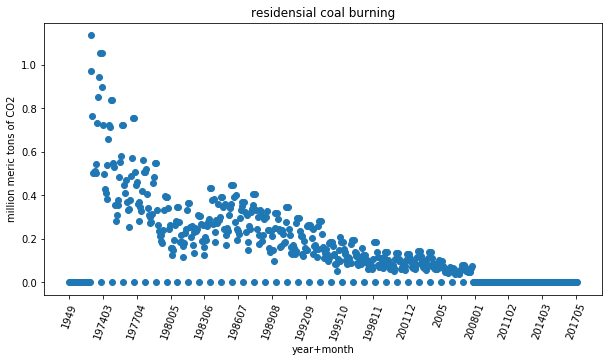

In [628]:
fig, axs = plt.subplots()
fig.set_size_inches(10,5)

axs.plot(x,y_res,'o')
axs.set_title('residensial coal burning')
axs.set_xlabel('year+month')
axs.set_ylabel('million meric tons of CO2')
#axs.set_xticks(rotation=90)
axs.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.xticks(rotation=70)
plt.savefig('residential_coal_burning.png')

**There is an obvious downword trend since the 1950, but lets take a closer look in to the 2000s to compare to our coal ash data.**


In [481]:
len(res)

490

In [547]:
res_2000s = res[res.index.str.startswith('20')]

In [548]:
len(res_2000s)

115

In [500]:
res_2000s[-20:]

200704    0.051
200705    0.050
200706    0.048
200707    0.049
200708    0.052
200709    0.047
200710    0.064
200711    0.076
200712    0.082
2008      0.000
2009      0.000
2010      0.000
2011      0.000
2012      0.000
2013      0.000
2014      0.000
2015      0.000
2016      0.000
201705    0.000
201706    0.000
Name: Coal Residential Sector CO2 Emissions, Monthly, dtype: float64

In [550]:
#checking for nans
res_2000s.isna().sum()

0

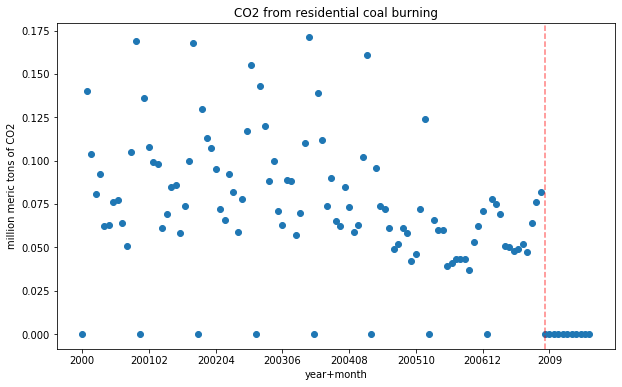

In [630]:
fig, axs = plt.subplots()
fig.set_size_inches(10,6)

axs.plot(res_2000s.index,res_2000s.values,'o')
axs.set_title('CO2 from residential coal burning')
axs.set_xlabel('year+month')
axs.set_ylabel('million meric tons of CO2')
#axs.set_xticklabels(res_2000s.index, rotation=90);
axs.xaxis.set_major_locator(plt.MaxNLocator(12))
axs.axvline('2008',color='r',linestyle='--',alpha=0.5)
plt.savefig('co2_res_2000.png');

**The red dashed line is right at 2008** once again the reporting has drastically changed. 

Lets look at CO2 from other sectors.

In [556]:
#Coal Electric Power Sector CO2 Emissions, Monthly
CO2_from_electric = CO2_coal['Coal Electric Power Sector CO2 Emissions, Monthly'].sort_index()

In [559]:
#checking for nans
CO2_from_electric.isna().sum()

0

In [560]:
#checking for non float
CO2_from_electric[type(CO2_from_electric.values) != float]

0.0

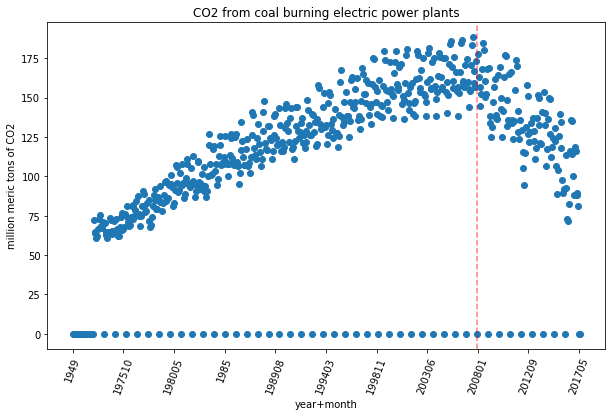

In [631]:
fig, axs = plt.subplots()
fig.set_size_inches(10,6)

axs.plot(CO2_from_electric.index,CO2_from_electric.values,'o')
axs.set_title('CO2 from coal burning electric power plants')
axs.set_xlabel('year+month')
axs.set_ylabel('million meric tons of CO2')
#axs.set_xticklabels(res_2000s.index, rotation=90);
axs.xaxis.set_major_locator(plt.MaxNLocator(12))
axs.axvline('2008',color='r',linestyle='--',alpha=0.5);
plt.xticks(rotation=70)
plt.savefig('co2_coal_electric.png');


**This look like reporting in the sector was good. and right at 2008 emission droped drastically. This is very exciting.**

lets see what else is in our totals.json

In [581]:

#droping some columns, making name clumn the index and transposing
wind_df = totals[totals['name'].str.contains('Wind')].drop([ 'data','last_updated', 'f','start','end'], axis=1).set_index('name').T.sort_index(axis=0)

In [582]:
wind_df.head(20)

name,"Wind Energy Consumed by the Commercial Sector, Monthly","Wind Energy Consumed by the Electric Power Sector, Monthly","Electricity Net Generation From Wind, Electric Power Sector, Monthly","Electricity Net Generation From Wind, All Sectors, Monthly","Wind Energy Consumed by the Industrial Sector, Monthly","Wind Energy Consumption/Production, Monthly","Wind Energy Consumed by the Electric Power Sector, Annual","Electricity Net Generation From Wind, Electric Power Sector, Annual","Electricity Net Generation From Wind, All Sectors, Annual","Wind Energy, Adjustment for Fossil Fuel Equivalence, Annual","Wind Energy, Transformed Into Electricity, Annual","Wind Energy Consumption/Production, Annual"
1949,0,0,0,0,0,0,NA,NA,NA,NA,NA,NA
1950,0,0,0,0,0,0,NA,NA,NA,NA,NA,NA
1951,0,0,0,0,0,0,NA,NA,NA,NA,NA,NA
1952,0,0,0,0,0,0,NA,NA,NA,NA,NA,NA
1953,0,0,0,0,0,0,NA,NA,NA,NA,NA,NA
1954,0,0,0,0,0,0,NA,NA,NA,NA,NA,NA
1955,0,0,0,0,0,0,NA,NA,NA,NA,NA,NA
1956,0,0,0,0,0,0,NA,NA,NA,NA,NA,NA
1957,0,0,0,0,0,0,NA,NA,NA,NA,NA,NA
1958,0,0,0,0,0,0,NA,NA,NA,NA,NA,NA


There are alot of nans and zeros becacause are data starts in the 1950s. lets look at the 2000s

In [584]:
wind_2000s = wind_df[wind_df.index.str.startswith('20')]

In [585]:
#wind power df
wind_2000s

name,"Wind Energy Consumed by the Commercial Sector, Monthly","Wind Energy Consumed by the Electric Power Sector, Monthly","Electricity Net Generation From Wind, Electric Power Sector, Monthly","Electricity Net Generation From Wind, All Sectors, Monthly","Wind Energy Consumed by the Industrial Sector, Monthly","Wind Energy Consumption/Production, Monthly","Wind Energy Consumed by the Electric Power Sector, Annual","Electricity Net Generation From Wind, Electric Power Sector, Annual","Electricity Net Generation From Wind, All Sectors, Annual","Wind Energy, Adjustment for Fossil Fuel Equivalence, Annual","Wind Energy, Transformed Into Electricity, Annual","Wind Energy Consumption/Production, Annual"
2000,0,0,0,0,0,0,57.057,5593.26,5593.26,37.973,19.084,57.057
200001,-,6.583,645.286,645.286,-,6.583,0,0,0,0,0,0
200002,-,7.201,705.904,705.904,-,7.201,0,0,0,0,0,0
200003,-,3.571,350.019,350.019,-,3.571,0,0,0,0,0,0
200004,-,3.367,330.074,330.074,-,3.367,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
201702,0.096,201.987,21674.7,21691.6,0.061,202.144,0,0,0,0,0,0
201703,0.147,238.342,25575.9,25598.9,0.068,238.556,0,0,0,0,0,0
201704,0.131,236.536,25382.1,25403.1,0.065,236.731,0,0,0,0,0,0
201705,0,0,0,0,0,0,0,0,0,0,0,0


In [595]:
#solar power from 2000s
solar_df = totals[totals['name'].str.contains('Solar')].drop([ 'data','last_updated', 'f','start','end'], axis=1).set_index('name').T.sort_index(axis=0)
solar_2000s = solar_df[solar_df.index.str.startswith('20')]

In [762]:
#uclear power in the 2000s
nuclear_df = totals[totals['name'].str.contains('Nuclear')].drop([ 'data','last_updated', 'f','start','end'], axis=1).set_index('name').T.sort_index(axis=0)
nuclear_2000s = nuclear_df[nuclear_df.index.str.startswith('20')]
#totals[totals['name'].str.contains('Nuclear')]

In [597]:
#hydroelectric powe in the 2000s
hydro_df = totals[totals['name'].str.contains('Hydroelectric')].drop([ 'data','last_updated', 'f','start','end'], axis=1).set_index('name').T.sort_index(axis=0)
hydro_2000s = hydro_df[hydro_df.index.str.startswith('20')]

In [598]:
# creating a sub df of geothermal energy in the 2000s
geotherm_df = totals[totals['name'].str.contains('Geothermal')].drop([ 'data','last_updated', 'f','start','end'], axis=1).set_index('name').T.sort_index(axis=0)
geotherm_2000s = geotherm_df[geotherm_df.index.str.startswith('20')]

checking for other formes of reneable energy. I am perposly leaving out "biomass burning" becasue resent studies show that it is not good for the environmanet

In [572]:
totals[totals['name'].str.contains('Tidal')]

,name,units,f,start,end,last_updated,data,2002,1980,198209,...,199912,197312,199305,200904,198806,200412,198906,200804,197810,197908


In [573]:
totals[totals['name'].str.contains('Ocean')]

,name,units,f,start,end,last_updated,data,2002,1980,198209,...,199912,197312,199305,200904,198806,200412,198906,200804,197810,197908


In [574]:
totals[totals['name'].str.contains('Wave')]

,name,units,f,start,end,last_updated,data,2002,1980,198209,...,199912,197312,199305,200904,198806,200412,198906,200804,197810,197908


**Lets plot the consumption/production column from each green sector. I believe this will give us a windo into the future of grean energy. are we using it faster or slower then we are producing it?**


In [633]:
#create x and y for wind
x = wind_2000s.index
y_wind = wind_2000s['Wind Energy Consumption/Production, Monthly'] 
#wind_2000s.columns

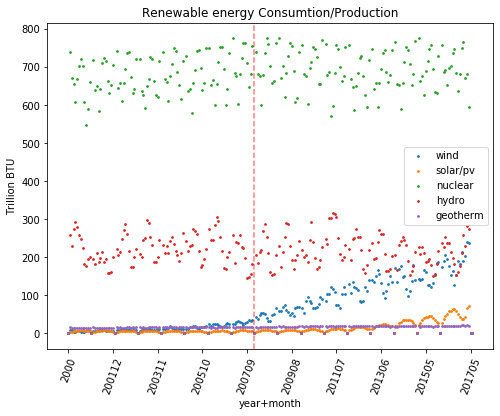

In [634]:
fig, axs = plt.subplots()
fig.set_size_inches(8,6)

marker_size = 3
axs.scatter(x,y_wind,label='wind',s=marker_size)
axs.scatter(x,solar_2000s['Solar/PV Energy Consumption/Production, Monthly'],label='solar/pv',s=marker_size)
axs.scatter(x,nuclear_2000s['Nuclear Electric Power Consumption/Production, Monthly'],label='nuclear',s=marker_size)
axs.scatter(x,hydro_2000s['Hydroelectric Power Consumption/Production, Monthly'],label='hydro',s=marker_size)
axs.scatter(x,geotherm_2000s['Geothermal Energy Consumption/Production, Monthly'],label='geotherm',s=marker_size)

axs.set_title('Renewable energy Consumtion/Production')
axs.set_xlabel('year+month')
axs.set_ylabel('Trillion BTU')
#axs.set_xticklabels(res_2000s.index, rotation=90);
axs.xaxis.set_major_locator(plt.MaxNLocator(12))
axs.axvline('2008',color='r',linestyle='--',alpha=0.5);
plt.xticks(rotation=70)
plt.legend()
#axs.axhline(0,color='k')
plt.savefig('renewable_production.png');

In [621]:
geotherm_2000s.columns


Index(['Geothermal Energy Consumed by the Residential Sector, Monthly',
       'Geothermal Energy Consumption/Production, Monthly',
       'Geothermal Energy Consumed by the Commercial Sector, Monthly',
       'Geothermal Energy Consumed by the Electric Power Sector, Monthly',
       'Electricity Net Generation From Geothermal, Electric Power Sector, Monthly',
       'Geothermal Energy Electric Power Sector CO2 Emissions, Monthly',
       'Electricity Net Generation From Geothermal, All Sectors, Monthly',
       'Geothermal Energy Consumed by the Industrial Sector, Monthly',
       'Geothermal Energy Electric Power Sector CO2 Emissions, Annual'],
      dtype='object', name='name')

Lets compare coal for electric power and nuclear for electric power

In [697]:
nuclear_2000s.head(20)

name,"Nuclear Generating Units, Capacity Factor, Monthly","Nuclear Electric Power Consumed by the Electric Power Sector, Monthly","Electricity Net Generation From Nuclear Electric Power, Electric Power Sector, Monthly","Nuclear Electric Power Consumption/Production, Monthly","Electricity Net Generation From Nuclear Electric Power, All Sectors, Monthly","Nuclear Share of Electricity Net Generation, Monthly","Nuclear Generating Units, Net Summer Capacity, End of Period, Monthly","Nuclear Generating Units, Total Operable Units, End of Period, Monthly"
2000,0,0,0,0,0,0,0,0
200001,93.8,737.981,70762.4,737.981,70762,21.6,97.411,104
200002,91,669.318,64178.5,669.318,64179,21.8,97.411,104
200003,83.5,654.279,62736.5,654.279,62737,20.8,97.411,104
200004,80.2,607.585,58259.1,607.585,58259,20.4,97.411,104
200005,84.8,667.205,63975.9,667.205,63976,19.8,97.411,104
200006,92.1,701.857,67298.6,701.857,67299,19.8,97.411,104
200007,95.4,719.306,68971.7,719.306,68972,19.3,97.411,104
200008,93.8,701.102,67226.1,701.102,67226,18.2,97.411,104
200009,87.8,607.662,58266.6,607.662,58267,18.6,97.411,104


In [718]:
#nuc_to_electric
nuc_to_electric = nuclear_2000s['Nuclear Electric Power Consumed by the Electric Power Sector, Monthly']

In [719]:
type(nuc_to_electric)

pandas.core.series.Series

In [720]:
# lets just try taking out the zeros
nuc_to_electric = nuc_to_electric[nuc_to_electric !=0]

In [721]:
nuc_to_electric.index


Index(['200001', '200002', '200003', '200004', '200005', '200006', '200007',
       '200008', '200009', '200010',
       ...
       '201607', '201608', '201609', '201610', '201611', '201612', '201701',
       '201702', '201703', '201704'],
      dtype='object', length=208)

In [722]:
pd.to_datetime(nuc_to_electric.index,format='%Y%m')

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01',
               '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01',
               '2017-03-01', '2017-04-01'],
              dtype='datetime64[ns]', length=208, freq=None)

In [724]:
nuc_to_electric.index  =pd.to_datetime(nuc_to_electric.index,format='%Y%m')

In [781]:
nuc_to_electric = nuc_to_electric.reset_index()
#nuc_to_electric

In [731]:
nuc_to_electric['year'] = nuc_to_electric['index'].dt.year
nuc_to_electric['month'] = nuc_to_electric['index'].dt.month

In [780]:
#nuc_to_electric

In [748]:
nuc_to_electric['Nuclear Electric Power Consumed by the Electric Power Sector, Monthly'] =nuc_to_electric['Nuclear Electric Power Consumed by the Electric Power Sector, Monthly'].astype(float) 

In [779]:
#nuc_to_electric.info()


In [752]:
nuc_ave_month = nuc_to_electric.groupby(['month']).mean()

In [778]:
#nuc_ave_month.head(3)

In [782]:
#lets do the same for coal to electric
coal_totals
coal_df = coal_totals.drop([ 'data','last_updated', 'f','start','end'], axis=1).set_index('name').T.sort_index(axis=0)
coal_2000s = coal_df[coal_df.index.str.startswith('20')]
coal_2000s['Coal Consumption for Electricity Generation, Electric Power Sector, Monthly']

2000            0
200001    88158.1
200002    79412.3
200003    77677.5
200004    70002.6
           ...   
201702    47875.6
201703    48644.4
201704    44221.6
201705          0
201706          0
Name: Coal Consumption for Electricity Generation, Electric Power Sector, Monthly, Length: 227, dtype: object

In [783]:
coal_to_electric = coal_2000s['Coal Consumption for Electricity Generation, Electric Power Sector, Monthly']
coal_to_electric = coal_to_electric[coal_to_electric !=0]
coal_to_electric.index  =pd.to_datetime(coal_to_electric.index,format='%Y%m')
coal_to_electric = coal_to_electric.reset_index()
coal_to_electric['year'] = coal_to_electric['index'].dt.year
coal_to_electric['month'] = coal_to_electric['index'].dt.month
coal_to_electric['Coal Consumption for Electricity Generation, Electric Power Sector, Monthly'] =coal_to_electric['Coal Consumption for Electricity Generation, Electric Power Sector, Monthly'].astype(float)
coal_ave_month = coal_to_electric.groupby(['month']).mean()

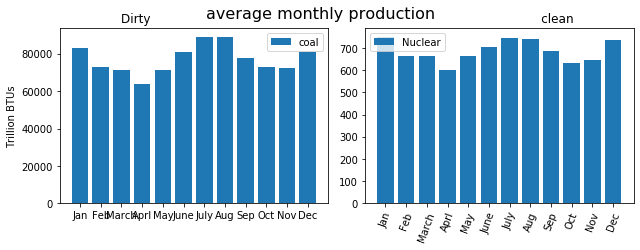

In [824]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(9,3.5)

ticks =['Jan','Feb','March','Aprl','May','June','July','Aug','Sep','Oct','Nov','Dec']
axs[0].bar(coal_ave_month.index,coal_ave_month['Coal Consumption for Electricity Generation, Electric Power Sector, Monthly'],label='coal',align='center',tick_label=ticks)
axs[0].set_title('Dirty                              ')


axs[1].set_title('                              clean')
axs[1].bar(nuc_ave_month.index, nuc_ave_month['Nuclear Electric Power Consumed by the Electric Power Sector, Monthly'],label='Nuclear',align='center',tick_label=ticks)

axs[0].legend()
axs[1].legend()
fig.suptitle('average monthly production',size=16)
axs[0].set_ylabel('Trillion BTUs')
plt.xticks(rotation=70)
plt.tight_layout();


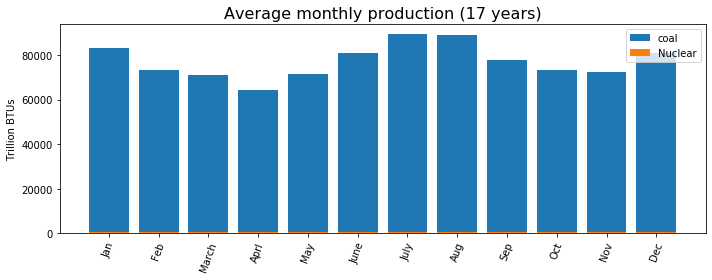

In [841]:
fig, axs = plt.subplots()
fig.set_size_inches(10,4)

ticks =['Jan','Feb','March','Aprl','May','June','July','Aug','Sep','Oct','Nov','Dec']
axs.bar(coal_ave_month.index,coal_ave_month['Coal Consumption for Electricity Generation, Electric Power Sector, Monthly'],label='coal',align='center',tick_label=ticks)
#axs.set_title('Dirty                              ')


#axs[1].set_title('                              clean')
axs.bar(nuc_ave_month.index, nuc_ave_month['Nuclear Electric Power Consumed by the Electric Power Sector, Monthly'],label='Nuclear',align='center',tick_label=ticks)

#axs[0].legend()
axs.legend()
axs.set_title('Average monthly production (17 years)',size=16)
axs.set_ylabel('Trillion BTUs')
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig('17yr-monthly-coal-nuc.png');


In [833]:
ave_coal_1year = coal_ave_month[coal_ave_month['year']==2017]
ave_nuc_1year = nuc_ave_month[nuc_ave_month['year']==2017]

In [838]:
coal_ave_month

,"Coal Consumption for Electricity Generation, Electric Power Sector, Monthly",year
month,,
1,83272.105778,2008.5
2,73065.255944,2008.5
3,71189.492111,2008.5
4,64084.339167,2008.5
5,71640.369118,2008.0
6,80796.364706,2008.0
7,89172.819412,2008.0
8,89068.030471,2008.0
9,77818.233000,2008.0


In [850]:
# taking just nuclear averageing my month in 2016
nuclear_2016 = nuclear_df[nuclear_df.index.str.startswith('2016')]
nuc_to_electric2 = nuclear_2016['Nuclear Electric Power Consumed by the Electric Power Sector, Monthly']
nuc_to_electric2 = nuc_to_electric2[nuc_to_electric2 !=0]
nuc_to_electric2.index  =pd.to_datetime(nuc_to_electric2.index,format='%Y%m')
nuc_to_electric2 = nuc_to_electric2.reset_index()
nuc_to_electric2['year'] = nuc_to_electric2['index'].dt.year
nuc_to_electric2['month'] = nuc_to_electric2['index'].dt.month
nuc_to_electric2['Nuclear Electric Power Consumed by the Electric Power Sector, Monthly'] =nuc_to_electric2['Nuclear Electric Power Consumed by the Electric Power Sector, Monthly'].astype(float) 
nuc_ave_month2 = nuc_to_electric2.groupby(['month']).mean()

nuc_ave_month2



,"Nuclear Electric Power Consumed by the Electric Power Sector, Monthly",year
month,,
1,758.464,2016
2,686.444,2016
3,691.785,2016
4,652.214,2016
5,696.257,2016
6,702.520,2016
7,735.713,2016
8,748.023,2016
9,684.457,2016


In [851]:
#coal 2016
coal_2016 = coal_df[coal_df.index.str.startswith('2016')]
coal_2016['Coal Consumption for Electricity Generation, Electric Power Sector, Monthly']
coal_to_electric2 = coal_2016['Coal Consumption for Electricity Generation, Electric Power Sector, Monthly']
coal_to_electric2 = coal_to_electric2[coal_to_electric2 !=0]
coal_to_electric2.index  =pd.to_datetime(coal_to_electric2.index,format='%Y%m')
coal_to_electric2 = coal_to_electric2.reset_index()
coal_to_electric2['year'] = coal_to_electric2['index'].dt.year
coal_to_electric2['month'] = coal_to_electric2['index'].dt.month
coal_to_electric2['Coal Consumption for Electricity Generation, Electric Power Sector, Monthly'] =coal_to_electric2['Coal Consumption for Electricity Generation, Electric Power Sector, Monthly'].astype(float)
coal_ave_month2 = coal_to_electric2.groupby(['month']).mean()
coal_ave_month2

,"Coal Consumption for Electricity Generation, Electric Power Sector, Monthly",year
month,,
1,61715.537,2016
2,50256.362,2016
3,39538.092,2016
4,38725.016,2016
5,44767.025,2016
6,63006.694,2016
7,73902.087,2016
8,73526.324,2016
9,62149.322,2016


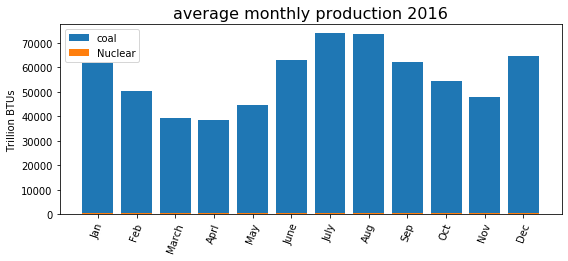

In [854]:
fig, axs = plt.subplots()
fig.set_size_inches(9,3.5)

ticks =['Jan','Feb','March','Aprl','May','June','July','Aug','Sep','Oct','Nov','Dec']
axs.bar(coal_ave_month2.index,coal_ave_month2['Coal Consumption for Electricity Generation, Electric Power Sector, Monthly'],label='coal',align='center',tick_label=ticks)


axs.bar(nuc_ave_month2.index, nuc_ave_month2['Nuclear Electric Power Consumed by the Electric Power Sector, Monthly'],label='Nuclear',align='center',tick_label=ticks)


axs.legend()
axs.set_title('average monthly production 2016',size=16)
axs.set_ylabel('Trillion BTUs')
plt.xticks(rotation=70)
#plt.tight_layout();
plt.savefig('2016-coal-nuc.png')

**moving on to percentages of clean and dirty energy per year**

TOTAL ENERGY colums from total.json
 - Total Energy Consumed by the Transportation Se...(these are all annual)
 - Total Energy Consumed by the Transportation Se...
 - Total Energy Consumed by the Commercial Sector...
 - Total Energy Consumed by the Commercial Sector...
 - Total Energy Consumed by the Industrial Sector...
 - Total Energy Consumed by the Industrial Sector...
 - Total Energy Consumed by the Residential Secto...
 - Total Energy Consumed by the Residential Secto...

TOTAL CLEAN ENERGY columns from total.json<br>
*note: eia considers renewables to be: solar, wind, hydro, geothermal other*
 - Total Renewable Energy Consumption, Annual 	Trillion Btu
 - Nuclear Electric Power Consumption/Production,.  monthly

In [160]:
# making a total_energy df
total_energy = totals[(totals['name'].str.contains('Total Energy Consumed by the')) &(totals['name'].str.contains('Annual'))]
totals_df= total_energy.drop([ 'data','units','last_updated', 'f','start','end'], axis=1).set_index('name').T.sort_index(axis=0)
totals_df = totals_df[totals_df !=0]
totals_df.dropna(axis=0,how='all',inplace=True)
totals_df['Total Energy'] = totals_df[list(totals_df.columns)].sum(axis=1)
totals_df.index.dtype

dtype('O')

In [161]:
# data frame of anual nuclear energy
total_nuc = totals[totals['name'].str.contains('Nuclear Electric Power Consumption/Production')]
total_nuc = total_nuc.drop([ 'data','units','last_updated', 'f','start','end'], axis=1).set_index('name').T.sort_index(axis=0)

total_nuc = total_nuc[total_nuc.index.str.len() > 4]
total_nuc.index  = pd.to_datetime(total_nuc.index,format='%Y%m')
total_nuc = total_nuc.reset_index()

total_nuc['year'] = total_nuc['index'].dt.year
total_nuc['month'] = total_nuc['index'].dt.month
total_nuc.drop(['index','month'],axis=1,inplace=True)

total_nuc = total_nuc.groupby('year').sum()
total_nuc['Total Nuclear'] = total_nuc['Nuclear Electric Power Consumption/Production, Monthly']
total_nuc.drop('Nuclear Electric Power Consumption/Production, Monthly',axis=1,inplace=True)
total_nuc.index.rename('year',inplace=True)
total_nuc.head()

name,Total Nuclear
year,
1973,910.178
1974,1272.084
1975,1899.797
1976,2111.119
1977,2701.763


In [145]:
total_nuc.shape

(45, 1)

In [162]:
total_nuc.index = total_nuc.index.map(str)
total_nuc.index.dtype

dtype('O')

In [163]:
# df of total renewable consumtion
total_renew = totals[totals['name'].str.contains('Total Renewable Energy Consumption, Annual')]
total_renew = total_renew.drop([ 'data','units','last_updated', 'f','start','end'], axis=1).set_index('name').T.sort_index(axis=0)
total_renew = total_renew[total_renew.index.str.len() == 4]
total_renew = total_renew.reset_index()
total_renew['Total Renewable'] = total_renew['Total Renewable Energy Consumption, Annual']
total_renew.drop('Total Renewable Energy Consumption, Annual',axis=1, inplace=True)
total_renew = total_renew.set_index('index')
total_renew.index.rename('year',inplace=True)
#total_renew.index.astype('Int64')
total_renew.index.dtype



dtype('O')

In [164]:
# I am goin to left join everthing to nuclear data set becasue it is recorded only after 1979 as opposed to the other df who start reporting at 1949
total_clean = total_nuc.join(total_renew,how='inner')
totals_df = totals_df.join(total_clean,how='inner')


name,"Total Energy Consumed by the Transportation Sector, Annual","Total Energy Consumed by the Commercial Sector, Annual","Total Energy Consumed by the Industrial Sector, Annual","Total Energy Consumed by the Residential Sector, Annual",Total Energy,Total Nuclear,Total Renewable
1973,18612.8,9542.96,32623.3,14897.4,75676.356,910.178,4410.94
1974,18120.4,9393.32,31787.2,14654.3,73955.266,1272.084,4741.85
1975,18245,9492.49,29413,14813.4,71963.913,1899.797,4687.12
1976,19100.8,10063.3,31392.8,15410.3,75967.212,2111.119,4727.15
1977,19821.6,10207.6,32263,15661.7,77953.911,2701.763,4208.97
1978,20617.1,10511.9,32687.6,16132.3,79948.787,3024.125,5005.44
1979,20471.5,10648,33924.7,15812.7,80857.020,2775.826,5122.85
1980,19696.7,10578.3,32039.4,15753.4,78067.747,2739.169,5428.34
1981,19514,10615.9,30711.6,15261.5,76103.009,3007.592,5413.69
1982,19089.2,10860.3,27614.5,15530.9,73094.996,3131.149,5979.64


In [166]:
totals_df['Total Clean'] = totals_df['Total Nuclear'] + totals_df['Total Renewable']
totals_df['Percent Clean'] = totals_df['Total Clean']/totals_df['Total Energy']
totals_df

name,"Total Energy Consumed by the Transportation Sector, Annual","Total Energy Consumed by the Commercial Sector, Annual","Total Energy Consumed by the Industrial Sector, Annual","Total Energy Consumed by the Residential Sector, Annual",Total Energy,Total Nuclear,Total Renewable,Total Clean,Percent Clean
1973,18612.8,9542.96,32623.3,14897.4,75676.356,910.178,4410.94,5321.12,0.0703141
1974,18120.4,9393.32,31787.2,14654.3,73955.266,1272.084,4741.85,6013.94,0.0813186
1975,18245,9492.49,29413,14813.4,71963.913,1899.797,4687.12,6586.92,0.0915308
1976,19100.8,10063.3,31392.8,15410.3,75967.212,2111.119,4727.15,6838.27,0.0900161
1977,19821.6,10207.6,32263,15661.7,77953.911,2701.763,4208.97,6910.73,0.0886515
1978,20617.1,10511.9,32687.6,16132.3,79948.787,3024.125,5005.44,8029.57,0.100434
1979,20471.5,10648,33924.7,15812.7,80857.020,2775.826,5122.85,7898.68,0.097687
1980,19696.7,10578.3,32039.4,15753.4,78067.747,2739.169,5428.34,8167.51,0.104621
1981,19514,10615.9,30711.6,15261.5,76103.009,3007.592,5413.69,8421.28,0.110656
1982,19089.2,10860.3,27614.5,15530.9,73094.996,3131.149,5979.64,9110.79,0.124643


''

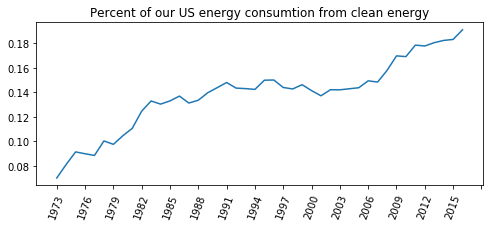

In [178]:
#Lets see how it looks
import matplotlib.pyplot as plt

fig, axs = plt.subplots()
fig.set_size_inches(8,3)
x = totals_df.index
y = totals_df['Percent Clean']
axs.plot(x,y)
plt.title('Percent of our US energy consumtion from clean energy')
axs.xaxis.set_major_locator(plt.MaxNLocator(16))
plt.xticks(rotation=70)
#plt.tight_layout();
plt.savefig('percent-clean.png')
;